In [66]:
# Declaramos las librerías
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np

ImportError: cannot import name '_saturate_cast' from 'keras.src.ops.core' (/opt/anaconda3/lib/python3.12/site-packages/keras/src/ops/core.py)

In [6]:
# Cargar el conjunto de datos MNIST
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [7]:
# Normalizar los datos de las imágenes para que los valores de los píxeles estén entre 0 y 1
x_train, x_test = x_train / 255.0, x_test / 255.0

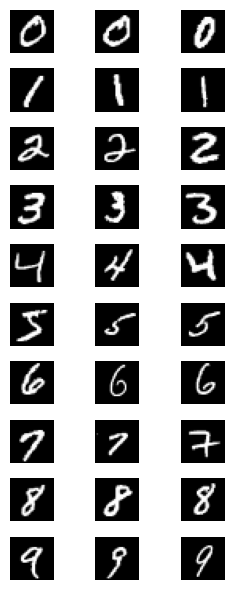

In [8]:
# Visualizar 3 imágenes de cada dígito
fig, axes = plt.subplots(nrows=10, ncols=3, figsize=(3, 6))
for i in range(10):
    indices = np.where(y_train == i)[0][:3]
    for j in range(3):
        ax = axes[i, j]
        ax.imshow(x_train[indices[j]], cmap='gray')
        ax.axis('off')
plt.tight_layout()
plt.show()

In [9]:
# Crear un modelo secuencial con la API de Keras
model = Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

In [10]:
# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
# Entrenar el modelo
model.fit(x_train, y_train, epochs=5, batch_size = 5)

Epoch 1/5
12000/12000 [==============================] - 14s 1ms/step - loss: 0.1054 - accuracy: 0.9672
Epoch 2/5
12000/12000 [==============================] - 17s 1ms/step - loss: 0.0933 - accuracy: 0.9716
Epoch 3/5
12000/12000 [==============================] - 15s 1ms/step - loss: 0.0821 - accuracy: 0.9749
Epoch 4/5
12000/12000 [==============================] - 13s 1ms/step - loss: 0.0748 - accuracy: 0.9771
Epoch 5/5
12000/12000 [==============================] - 13s 1ms/step - loss: 0.0689 - accuracy: 0.9784


In [14]:
# Evaluar el modelo con el conjunto de datos de prueba
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 386us/step - loss: 0.1020 - accuracy: 0.9742


[0.10203388333320618, 0.9742000102996826]

1/1 [==============================] - 0s 12ms/step


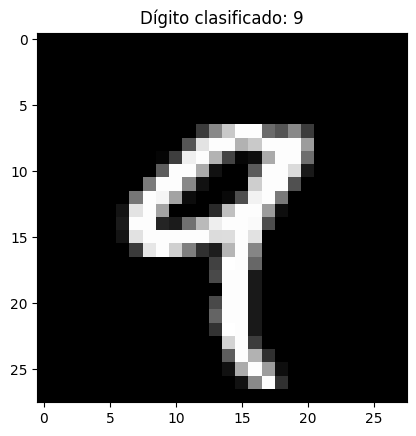

In [20]:
# Función para probar una nueva imagen
def test_new_image(img_path):
    # Cargar la imagen, convertirla al tamaño adecuado y en escala de grises
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(28, 28), color_mode='grayscale')
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.image.rgb_to_grayscale(img_array) if img_array.shape[-1] == 3 else img_array
    img_array = img_array / 255.0  # Normalizar la imagen
    img_array = np.expand_dims(img_array[:,:,0], 0)  # Asegurarse de que la imagen tiene la forma correcta (1, 28, 28)

    predictions = model.predict(img_array)
    predicted_digit = np.argmax(predictions)
    plt.imshow(img_array[0], cmap='gray')  # Mostrar la imagen adecuada
    plt.title(f'Dígito clasificado: {predicted_digit}')
    plt.show()

# Probamos nuestra imagen
test_new_image('9.png')

## Ejercicio con Fashion M-Nist

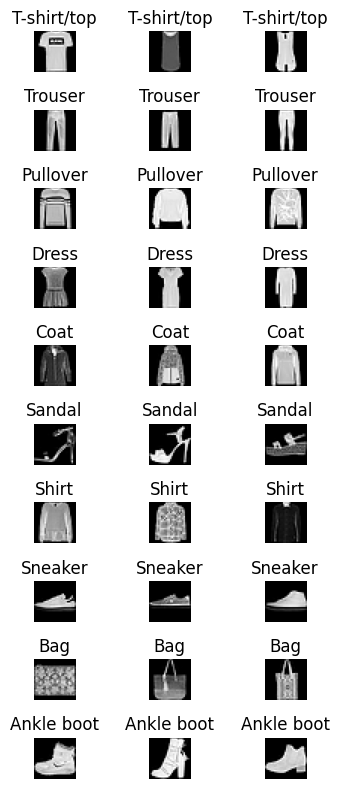

In [10]:
# Cargar el conjunto de datos Fashion MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalizar los datos de las imágenes para que los valores de los píxeles estén entre 0 y 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Categorías de Fashion MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Visualizar 3 imágenes de cada categoría
fig, axes = plt.subplots(nrows=10, ncols=3, figsize=(4, 8))
for i in range(10):
    indices = np.where(y_train == i)[0][:3]
    for j in range(3):
        ax = axes[i, j]
        ax.imshow(x_train[indices[j]], cmap='gray')
        ax.axis('off')
        ax.set_title(class_names[i])
plt.tight_layout()
plt.show()

In [ ]:

# Cargar el conjunto de datos Fashion MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalizar los datos de las imágenes para que los valores de los píxeles estén entre 0 y 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Categorías de Fashion MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Crear un modelo secuencial para Fashion MNIST
fashion_model = Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

# Compilar el modelo
fashion_model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

# Entrenar el modelo con Fashion MNIST
fashion_model.fit(x_train, y_train, epochs=5, batch_size=32)

# Evaluar el modelo con el conjunto de prueba
fashion_model.evaluate(x_test, y_test)

def test_fashion_image(img_path):
    # Cargar la imagen, convertirla a escala de grises y tamaño 28x28
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(28, 28), color_mode='grayscale')
    img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0  # Normalizar la imagen
    img_array = np.expand_dims(img_array[:, :, 0], axis=0)  # Ajustar forma a (1, 28, 28)

    # Realizar la predicción
    predictions = fashion_model.predict(img_array)
    predicted_index = np.argmax(predictions)  # Índice de la categoría predicha
    predicted_category = class_names[predicted_index]

    # Mostrar la imagen y la categoría predicha
    plt.imshow(img_array[0], cmap='gray')
    plt.title(f'Categoría clasificada: {predicted_category}')
    plt.axis('off')
    plt.show()

